In [1]:
# Tratamiento de datos
import pandas as pd 
from sqlalchemy import create_engine  # sqlalchemy es una librería que permite conectarse y trabajar con bases de datos de manera más abstracta y flexible. 'create_engine' permite crear una conexión a bases de datos SQL de diferentes tipos, como MySQL, PostgreSQL, SQLite, etc.
import pymysql
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Evaluar linealidad de las relaciones entre las variables
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# Cargar el CSV Dataset sacado de la página de la OMS estudio de HbSC 
df = pd.read_csv("C:/Users/lejob/OneDrive/Escritorio/Análisis de Datos/Adalab/Mi_proyecto_percepcion_corporal/Percepcion_corporal_adolescentes - Percepcion_corporal_adolescentes.csv.csv", low_memory=False)

# Ver primeras filas
print(df.head())

# Info general del dataset
print(df.info())

            Country  Survey_year     Age_group  Girl  Boy
0            Poland         2022  11-year-olds    46   38
1  Belgium (French)         2022  11-year-olds    40   29
2           Estonia         2022  11-year-olds    30   32
3           Germany         2022  11-year-olds    35   27
4           Hungary         2022  11-year-olds    37   25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      129 non-null    object
 1   Survey_year  129 non-null    int64 
 2   Age_group    129 non-null    object
 3   Girl         129 non-null    int64 
 4   Boy          129 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 5.2+ KB
None


In [3]:
pd.set_option("display.max_rows", None)     # mostrar todas las filas
pd.set_option("display.max_columns", None) # mostrar todas las columnas

print(df)

                 Country  Survey_year     Age_group  Girl  Boy
0                 Poland         2022  11-year-olds    46   38
1       Belgium (French)         2022  11-year-olds    40   29
2                Estonia         2022  11-year-olds    30   32
3                Germany         2022  11-year-olds    35   27
4                Hungary         2022  11-year-olds    37   25
5            Netherlands         2022  11-year-olds    38   23
6                Denmark         2022  11-year-olds    38   23
7                 Latvia         2022  11-year-olds    31   29
8             Luxembourg         2022  11-year-olds    33   27
9               Portugal         2022  11-year-olds    30   29
10               Austria         2022  11-year-olds    31   26
11             Lithuania         2022  11-year-olds    34   24
12           Switzerland         2022  11-year-olds    33   22
13               Finland         2022  11-year-olds    32   22
14             Greenland         2022  11-year-olds    

In [4]:
# Número de filas
num_filas = df.shape[0]

# Número de columnas
num_columnas = df.shape[1]

print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")


Número de filas: 129
Número de columnas: 5


In [5]:

#  Tipos de datos y valores nulos
# -------------------------------
print("\n===== TIPOS DE DATOS =====")
print(df.dtypes)
print("\n===== VALORES NULOS =====")
print(df.isnull().sum())

# -------------------------------
#  Primeras filas
# -------------------------------
print("\n===== PRIMERAS FILAS =====")
print(df.head(10))

# -------------------------------
#  Estadísticas descriptivas
# -------------------------------
print("\n===== ESTADÍSTICAS DESCRIPTIVAS NUMÉRICAS =====")
print(df.describe())
print("\n===== ESTADÍSTICAS DESCRIPTIVAS CATEGÓRICAS =====")
print(df.describe(include='object'))

# -------------------------------
#  Distribución de valores para columnas categóricas
# -------------------------------
categoricas = ['Country', 'Age_group', 'Survey_year']
for col in categoricas:
    if col in df.columns:
        print(f"\nDistribución de valores para columna: {col}")
        print(df[col].value_counts())

# -------------------------------
#  Detección de duplicados
# -------------------------------
print("\nNúmero de filas duplicadas:", df.duplicated().sum())



===== TIPOS DE DATOS =====
Country        object
Survey_year     int64
Age_group      object
Girl            int64
Boy             int64
dtype: object

===== VALORES NULOS =====
Country        0
Survey_year    0
Age_group      0
Girl           0
Boy            0
dtype: int64

===== PRIMERAS FILAS =====
            Country  Survey_year     Age_group  Girl  Boy
0            Poland         2022  11-year-olds    46   38
1  Belgium (French)         2022  11-year-olds    40   29
2           Estonia         2022  11-year-olds    30   32
3           Germany         2022  11-year-olds    35   27
4           Hungary         2022  11-year-olds    37   25
5       Netherlands         2022  11-year-olds    38   23
6           Denmark         2022  11-year-olds    38   23
7            Latvia         2022  11-year-olds    31   29
8        Luxembourg         2022  11-year-olds    33   27
9          Portugal         2022  11-year-olds    30   29

===== ESTADÍSTICAS DESCRIPTIVAS NUMÉRICAS =====
       S

In [6]:

# Quitar columna 'Survey_year' ya que no la necesitamos para el objetivo de este analisis
df = df.drop(columns=['Survey_year'])

#  Transformar a formato 'long' para análisis
df_long = df.melt(
    id_vars=['Country', 'Age_group'],   # columnas fijas
    value_vars=['Girl', 'Boy'],         # columnas que se convertirán en filas
    var_name='Sexo',                     # nueva columna que indica sexo
    value_name='Valor (%)'               # nueva columna con el porcentaje
)

# 4Agregar columna Indicador
df_long['Indicador'] = 'Demasiado gordo'

# Mostrar primeras filas
print(df_long.head())

            Country     Age_group  Sexo  Valor (%)        Indicador
0            Poland  11-year-olds  Girl         46  Demasiado gordo
1  Belgium (French)  11-year-olds  Girl         40  Demasiado gordo
2           Estonia  11-year-olds  Girl         30  Demasiado gordo
3           Germany  11-year-olds  Girl         35  Demasiado gordo
4           Hungary  11-year-olds  Girl         37  Demasiado gordo


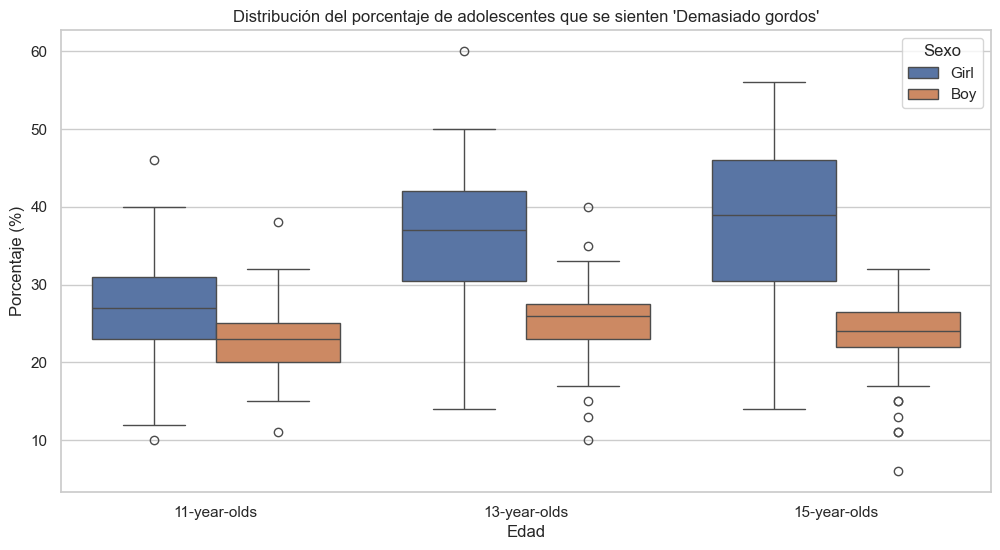

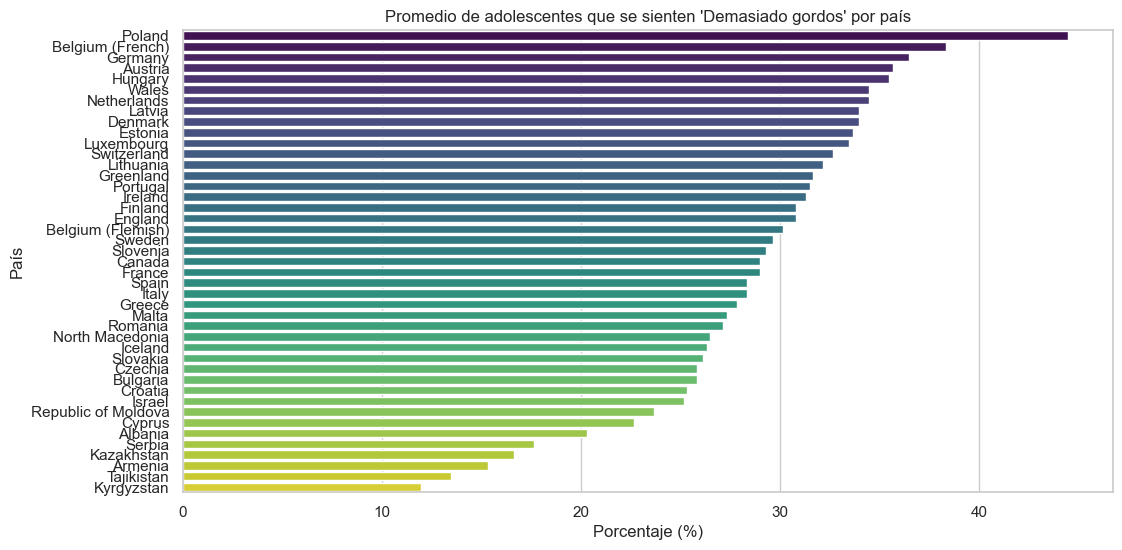

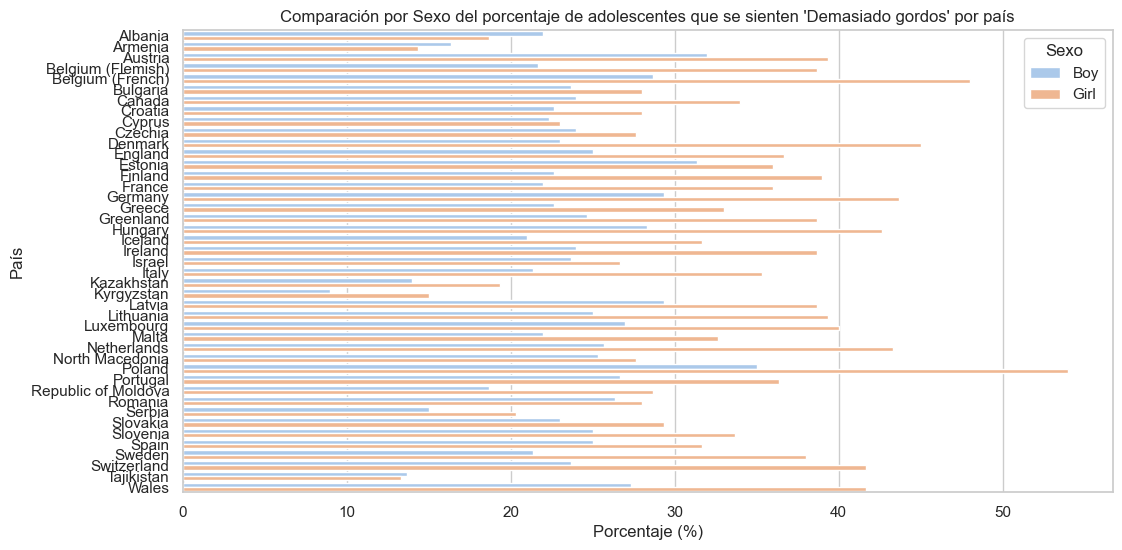

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1️⃣ Boxplot por Sexo y Edad
plt.figure()
sns.boxplot(data=df_long, x='Age_group', y='Valor (%)', hue='Sexo')
plt.title("Distribución del porcentaje de adolescentes que se sienten 'Demasiado gordos'")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Edad")
plt.legend(title='Sexo')
plt.show()

# 2️⃣ Gráfico de barras por País (promedio de todos los grupos de edad)
df_pais = df_long.groupby('Country')['Valor (%)'].mean().sort_values(ascending=False).reset_index()

plt.figure()
sns.barplot(data=df_pais, x='Valor (%)', y='Country', palette='viridis')
plt.title("Promedio de adolescentes que se sienten 'Demasiado gordos' por país")
plt.xlabel("Porcentaje (%)")
plt.ylabel("País")
plt.show()

# 3️⃣ Gráfico comparativo por Sexo y País
df_sexo_pais = df_long.groupby(['Country', 'Sexo'])['Valor (%)'].mean().reset_index()

plt.figure()
sns.barplot(data=df_sexo_pais, x='Valor (%)', y='Country', hue='Sexo', palette='pastel')
plt.title("Comparación por Sexo del porcentaje de adolescentes que se sienten 'Demasiado gordos' por país")
plt.xlabel("Porcentaje (%)")
plt.ylabel("País")
plt.show()


In [8]:
import os

# Ruta y nombre del archivo
ruta = r"C:\Users\lejob\OneDrive\Escritorio\Análisis de Datos\Adalab\Mi_proyecto_percepcion_corporal"
archivo = "percepcion_corporal_adolescentes_limpio.csv"
ruta_completa = os.path.join(ruta, archivo)

# Guardar el dataset limpio
df.to_csv(ruta_completa, index=False, encoding='utf-8')

print(f"Dataset guardado correctamente en: {ruta_completa}")


Dataset guardado correctamente en: C:\Users\lejob\OneDrive\Escritorio\Análisis de Datos\Adalab\Mi_proyecto_percepcion_corporal\percepcion_corporal_adolescentes_limpio.csv


In [9]:
# Mi primer proyecto en solitario: 
# ANÁLISIS DE LA PERCEPCIÓN CORPORAL EN ADOLESCENTES SEGÚN DATOS DE LA OMS